In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning
from sklearn.model_selection import TimeSeriesSplit, train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Utilities
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime, timedelta

# Set style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 1000)

In [2]:
def load_data():
    """Load all Walmart datasets"""
    train = pd.read_csv('../data/train.csv')
    test = pd.read_csv('../data/test.csv')
    features = pd.read_csv('../data/features.csv')
    stores = pd.read_csv('../data/stores.csv')
    
    # Convert date columns
    for df in [train, test, features]:
        if 'Date' in df.columns:
            df['Date'] = pd.to_datetime(df['Date'])
    
    return train, test, features, stores

# Load the data
train, test, features, stores = load_data()

FileNotFoundError: [Errno 2] No such file or directory: '../data/train.csv'

In [3]:
# Cell to check current directory structure
import os

print("Current working directory:", os.getcwd())
print("\nContents of current directory:")
for item in os.listdir('.'):
    print(f"  {item}")

# Check if data directory exists
if os.path.exists('./data'):
    print("\nContents of data directory:")
    for item in os.listdir('./data'):
        print(f"  {item}")
else:
    print("\nData directory does not exist")

Current working directory: /Users/mabook/walmart-sales-forecasting

Contents of current directory:
  Untitled1.ipynb
  .DS_Store
  requirements.txt
  Untitled.ipynb
  Untitled2.ipynb
  models
  scripts
  .ipynb_checkpoints
  data
  notebooks

Contents of data directory:
  sampleSubmission.csv
  test.csv
  train.csv
  features.csv
  stores.csv


In [4]:
def load_data():
    """Load all Walmart datasets from the correct path"""
    try:
        # Load data from the data/ directory
        train = pd.read_csv('data/train.csv')
        test = pd.read_csv('data/test.csv')
        features = pd.read_csv('data/features.csv')
        stores = pd.read_csv('data/stores.csv')
        
        # Convert date columns
        for df in [train, test, features]:
            if 'Date' in df.columns:
                df['Date'] = pd.to_datetime(df['Date'])
        
        print("Data loaded successfully!")
        return train, test, features, stores
        
    except FileNotFoundError as e:
        print(f"Error loading data: {e}")
        print("Available files in data directory:")
        data_files = os.listdir('data')
        for file in data_files:
            print(f"  {file}")
        return None, None, None, None

# Load the data
train, test, features, stores = load_data()

# Check if data was loaded successfully
if train is not None:
    print("\n=== DATASET SHAPES ===")
    print(f"Train data: {train.shape}")
    print(f"Test data: {test.shape}")
    print(f"Features data: {features.shape}")
    print(f"Stores data: {stores.shape}")
else:
    print("Failed to load data. Please check the file paths.")

Data loaded successfully!

=== DATASET SHAPES ===
Train data: (421570, 5)
Test data: (115064, 4)
Features data: (8190, 12)
Stores data: (45, 3)


In [5]:
# Data manipulation
import pandas as pd
import numpy as np
import os

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning
from sklearn.model_selection import TimeSeriesSplit, train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Utilities
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime, timedelta

# Set style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 1000)

print("Libraries imported successfully!")

Libraries imported successfully!


In [6]:
def load_data():
    """Load all Walmart datasets from the correct path"""
    try:
        # Load data from the data/ directory
        train = pd.read_csv('data/train.csv')
        test = pd.read_csv('data/test.csv')
        features = pd.read_csv('data/features.csv')
        stores = pd.read_csv('data/stores.csv')
        
        # Convert date columns
        for df in [train, test, features]:
            if 'Date' in df.columns:
                df['Date'] = pd.to_datetime(df['Date'])
        
        print("Data loaded successfully!")
        return train, test, features, stores
        
    except FileNotFoundError as e:
        print(f"Error loading data: {e}")
        print("Available files in data directory:")
        data_files = os.listdir('data')
        for file in data_files:
            print(f"  {file}")
        return None, None, None, None

# Load the data
train, test, features, stores = load_data()

# Check if data was loaded successfully
if train is not None:
    print("\n=== DATASET SHAPES ===")
    print(f"Train data: {train.shape}")
    print(f"Test data: {test.shape}")
    print(f"Features data: {features.shape}")
    print(f"Stores data: {stores.shape}")
else:
    print("Failed to load data. Please check the file paths.")

Data loaded successfully!

=== DATASET SHAPES ===
Train data: (421570, 5)
Test data: (115064, 4)
Features data: (8190, 12)
Stores data: (45, 3)


In [7]:
if train is not None:
    print("\n=== TRAIN DATA PREVIEW ===")
    display(train.head())

    print("\n=== FEATURES DATA PREVIEW ===")
    display(features.head())

    print("\n=== STORES DATA PREVIEW ===")
    display(stores.head())
else:
    print("Cannot display preview - data not loaded")


=== TRAIN DATA PREVIEW ===


,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False



=== FEATURES DATA PREVIEW ===


,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False



=== STORES DATA PREVIEW ===


,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [8]:
if train is not None:
    print("=== DATA TYPES AND MISSING VALUES ===")

    print("\nTrain data info:")
    print(train.info())
    print("\nMissing values in train:")
    print(train.isnull().sum())

    print("\nFeatures data info:")
    print(features.info())
    print("\nMissing values in features:")
    print(features.isnull().sum())

    print("\nStores data info:")
    print(stores.info())
    print("\nMissing values in stores:")
    print(stores.isnull().sum())
else:
    print("Cannot display data info - data not loaded")

=== DATA TYPES AND MISSING VALUES ===

Train data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(1), int64(2)
memory usage: 13.3 MB
None

Missing values in train:
Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

Features data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         8190 non-null   i

In [9]:
if train is not None:
    def merge_datasets(train, features, stores):
        """Merge all datasets into a comprehensive dataframe"""
        # Merge train with features
        merged = train.merge(features, on=['Store', 'Date'], how='left')
        
        # Merge with stores
        merged = merged.merge(stores, on=['Store'], how='left')
        
        return merged

    # Create merged dataset
    merged_data = merge_datasets(train, features, stores)

    print("Merged dataset shape:", merged_data.shape)
    print("\nMerged data columns:")
    print(merged_data.columns.tolist())

    display(merged_data.head())
else:
    print("Cannot merge data - data not loaded")

Merged dataset shape: (421570, 17)

Merged data columns:
['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday_x', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'IsHoliday_y', 'Type', 'Size']


,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,A,151315


In [11]:
# Cell to check column names
if 'merged_data' in locals() and merged_data is not None:
    print("Columns in merged_data:")
    print(merged_data.columns.tolist())
    
    # Check for holiday-related columns
    holiday_cols = [col for col in merged_data.columns if 'holiday' in col.lower() or 'Holiday' in col]
    print(f"\nHoliday-related columns: {holiday_cols}")
    
    # Check for duplicate column names after merge
    print(f"\nDuplicate columns: {merged_data.columns[merged_data.columns.duplicated()].tolist()}")
else:
    print("Merged data not available")

Columns in merged_data:
['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday_x', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'IsHoliday_y', 'Type', 'Size']

Holiday-related columns: ['IsHoliday_x', 'IsHoliday_y']

Duplicate columns: []


In [12]:
# Fix for Cell 7: Basic Statistics
if 'merged_data' in locals() and merged_data is not None:
    print("=== BASIC STATISTICS ===")
    print("Weekly Sales Statistics:")
    print(merged_data['Weekly_Sales'].describe())

    print("\nStore Types Distribution:")
    print(merged_data['Type'].value_counts())

    # Check which holiday column exists
    if 'IsHoliday_x' in merged_data.columns:
        print("\nHoliday Distribution (from train data):")
        print(merged_data['IsHoliday_x'].value_counts())
    elif 'IsHoliday_y' in merged_data.columns:
        print("\nHoliday Distribution (from features data):")
        print(merged_data['IsHoliday_y'].value_counts())
    elif 'IsHoliday' in merged_data.columns:
        print("\nHoliday Distribution:")
        print(merged_data['IsHoliday'].value_counts())
    else:
        print("\nNo IsHoliday column found. Available columns:")
        print([col for col in merged_data.columns if 'holiday' in col.lower()])
else:
    print("Merged data not available for analysis")

=== BASIC STATISTICS ===
Weekly Sales Statistics:
count    421570.000000
mean      15981.258123
std       22711.183519
min       -4988.940000
25%        2079.650000
50%        7612.030000
75%       20205.852500
max      693099.360000
Name: Weekly_Sales, dtype: float64

Store Types Distribution:
Type
A    215478
B    163495
C     42597
Name: count, dtype: int64

Holiday Distribution (from train data):
IsHoliday_x
False    391909
True      29661
Name: count, dtype: int64


In [13]:
# Revised data merging function
def merge_datasets(train, features, stores):
    """Merge all datasets into a comprehensive dataframe"""
    # First, rename the IsHoliday column in features to avoid conflict
    features_renamed = features.rename(columns={'IsHoliday': 'IsHoliday_Features'})
    
    # Merge train with features
    merged = train.merge(features_renamed, on=['Store', 'Date'], how='left')
    
    # Merge with stores
    merged = merged.merge(stores, on=['Store'], how='left')
    
    return merged

# Re-create the merged dataset with the fixed function
merged_data = merge_datasets(train, features, stores)

print("Merged dataset shape:", merged_data.shape)
print("\nMerged data columns:")
print(merged_data.columns.tolist())

display(merged_data.head())

Merged dataset shape: (421570, 17)

Merged data columns:
['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'IsHoliday_Features', 'Type', 'Size']


,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_Features,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,A,151315


In [14]:
if 'merged_data' in locals() and merged_data is not None:
    print("=== BASIC STATISTICS ===")
    print("Weekly Sales Statistics:")
    print(merged_data['Weekly_Sales'].describe())

    print("\nStore Types Distribution:")
    print(merged_data['Type'].value_counts())

    print("\nHoliday Distribution:")
    # Use the correct holiday column name
    holiday_col = 'IsHoliday' if 'IsHoliday' in merged_data.columns else 'IsHoliday_x'
    print(merged_data[holiday_col].value_counts())
    
    # Check markdown columns
    markdown_cols = [col for col in merged_data.columns if 'MarkDown' in col]
    print(f"\nMarkdown columns: {markdown_cols}")
else:
    print("Merged data not available for analysis")

=== BASIC STATISTICS ===
Weekly Sales Statistics:
count    421570.000000
mean      15981.258123
std       22711.183519
min       -4988.940000
25%        2079.650000
50%        7612.030000
75%       20205.852500
max      693099.360000
Name: Weekly_Sales, dtype: float64

Store Types Distribution:
Type
A    215478
B    163495
C     42597
Name: count, dtype: int64

Holiday Distribution:
IsHoliday
False    391909
True      29661
Name: count, dtype: int64

Markdown columns: ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']


In [15]:
if 'merged_data' in locals() and merged_data is not None:
    print("=== TIME RANGE ANALYSIS ===")
    print(f"Date range: {merged_data['Date'].min()} to {merged_data['Date'].max()}")
    print(f"Total weeks: {(merged_data['Date'].max() - merged_data['Date'].min()).days // 7}")

    # Store and department analysis
    print(f"\nUnique stores: {merged_data['Store'].nunique()}")
    print(f"Unique departments: {merged_data['Dept'].nunique()}")

    # Top departments by sales
    top_depts = merged_data.groupby('Dept')['Weekly_Sales'].sum().sort_values(ascending=False).head(10)
    print("\nTop 10 departments by total sales:")
    print(top_depts)
    
    # Top stores by sales
    top_stores = merged_data.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=False).head(10)
    print("\nTop 10 stores by total sales:")
    print(top_stores)
else:
    print("Merged data not available for analysis")

=== TIME RANGE ANALYSIS ===
Date range: 2010-02-05 00:00:00 to 2012-10-26 00:00:00
Total weeks: 142

Unique stores: 45
Unique departments: 81

Top 10 departments by total sales:
Dept
92    4.839433e+08
95    4.493202e+08
38    3.931181e+08
72    3.057252e+08
90    2.910685e+08
40    2.889360e+08
2     2.806112e+08
91    2.167817e+08
13    1.973216e+08
8     1.942808e+08
Name: Weekly_Sales, dtype: float64

Top 10 stores by total sales:
Store
20    3.013978e+08
4     2.995440e+08
14    2.889999e+08
13    2.865177e+08
2     2.753824e+08
10    2.716177e+08
27    2.538559e+08
6     2.237561e+08
1     2.224028e+08
39    2.074455e+08
Name: Weekly_Sales, dtype: float64


In [17]:
# Check for negative or zero sales values
if 'merged_data' in locals() and merged_data is not None:
    print("=== WEEKLY SALES VALUE ANALYSIS ===")
    
    # Check for negative values
    negative_sales = merged_data[merged_data['Weekly_Sales'] < 0]
    zero_sales = merged_data[merged_data['Weekly_Sales'] == 0]
    positive_sales = merged_data[merged_data['Weekly_Sales'] > 0]
    
    print(f"Number of negative sales records: {len(negative_sales)}")
    print(f"Number of zero sales records: {len(zero_sales)}")
    print(f"Number of positive sales records: {len(positive_sales)}")
    print(f"Total records: {len(merged_data)}")
    
    if len(negative_sales) > 0:
        print("\nNegative sales values:")
        print(negative_sales['Weekly_Sales'].describe())
        print("\nSample negative sales records:")
        display(negative_sales.head())
    
    if len(zero_sales) > 0:
        print("\nZero sales values:")
        print(zero_sales['Weekly_Sales'].describe())
        print("\nSample zero sales records:")
        display(zero_sales.head())
else:
    print("Merged data not available")

=== WEEKLY SALES VALUE ANALYSIS ===
Number of negative sales records: 1285
Number of zero sales records: 73
Number of positive sales records: 420212
Total records: 421570

Negative sales values:
count    1285.000000
mean      -68.608218
std       231.664245
min     -4988.940000
25%       -41.000000
50%       -13.200000
75%        -4.940000
max        -0.020000
Name: Weekly_Sales, dtype: float64

Sample negative sales records:


,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_Features,Type,Size
846,1,6,2012-08-10,-139.65,False,85.05,3.494,11436.22,245.0,6.85,6964.26,4836.22,221.958433,6.908,False,A,151315
2384,1,18,2012-05-04,-1.27,False,75.55,3.749,21290.13,NaN,69.89,4977.35,3261.04,221.671800,7.143,False,A,151315
6048,1,47,2010-02-19,-863.00,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,A,151315
6049,1,47,2010-03-12,-698.00,False,57.79,2.667,NaN,NaN,NaN,NaN,NaN,211.380643,8.106,False,A,151315
6051,1,47,2010-10-08,-58.00,False,63.93,2.633,NaN,NaN,NaN,NaN,NaN,211.746754,7.838,False,A,151315



Zero sales values:
count    73.0
mean      0.0
std       0.0
min       0.0
25%       0.0
50%       0.0
75%       0.0
max       0.0
Name: Weekly_Sales, dtype: float64

Sample zero sales records:


,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_Features,Type,Size
6055,1,47,2011-03-11,0.0,False,53.56,3.459,NaN,NaN,NaN,NaN,NaN,214.111056,7.742,False,A,151315
6059,1,47,2011-08-12,0.0,False,90.76,3.638,NaN,NaN,NaN,NaN,NaN,215.605788,7.962,False,A,151315
6060,1,47,2011-08-19,0.0,False,89.94,3.554,NaN,NaN,NaN,NaN,NaN,215.669311,7.962,False,A,151315
16309,2,47,2012-04-13,0.0,False,68.08,3.891,8994.04,6573.08,20.21,4162.2,1966.38,221.148403,6.891,False,A,202307
17457,2,60,2010-03-19,0.0,False,54.52,2.720,NaN,NaN,NaN,NaN,NaN,210.873332,8.324,False,A,202307


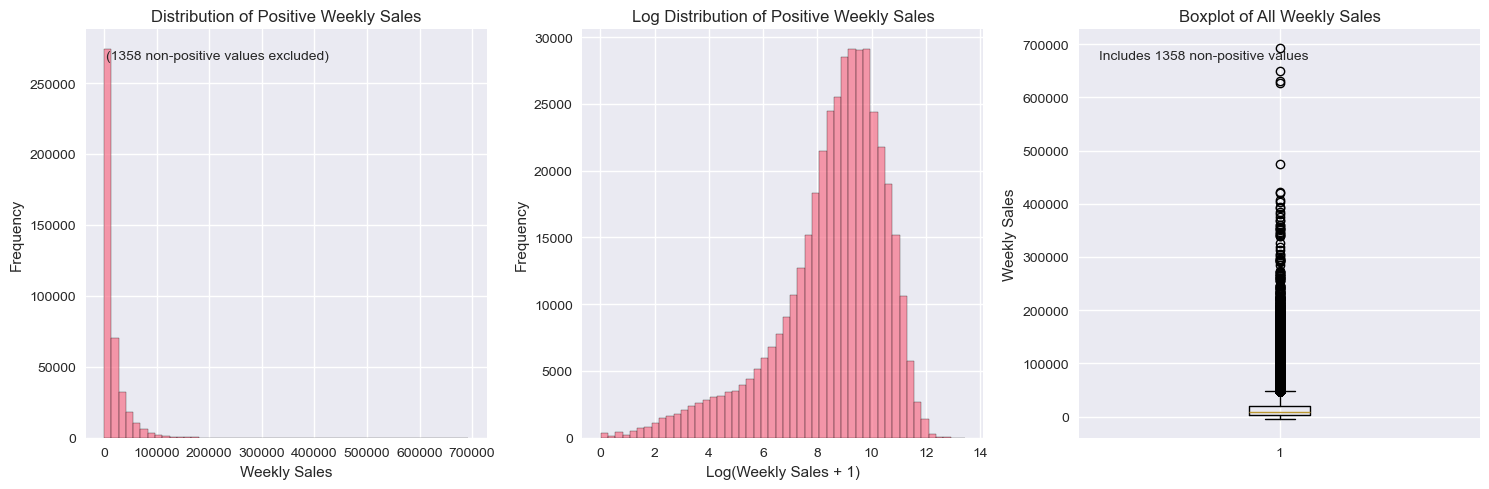

Number of outliers in positive Weekly_Sales: 35377
Outlier percentage: 8.42%

Analysis of 1285 negative sales records:
Stores with negative sales: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]
Departments with negative sales: [ 6 18 47 48 54 45 99 32 59 77 19 56 94 98 36 78 35 49 51 80 60 97 96 37
 83 93 41 50 58  5 22 26 27 31 44 72  9 23 55 16 24 33 34 71 85 25 52 74
 28 12]
Dates with negative sales: [datetime.date(2012, 8, 10) datetime.date(2012, 5, 4)
 datetime.date(2010, 2, 19) datetime.date(2010, 3, 12)
 datetime.date(2010, 10, 8) datetime.date(2011, 4, 8)
 datetime.date(2011, 7, 8) datetime.date(2011, 10, 14)
 datetime.date(2011, 12, 23) datetime.date(2012, 2, 17)
 datetime.date(2012, 3, 16) datetime.date(2012, 3, 23)
 datetime.date(2011, 1, 21) datetime.date(2011, 5, 20)
 datetime.date(2012, 3, 9) datetime.date(2012, 6, 1)
 datetime.date(2012, 7, 27) datetime.date(2010, 4, 9)
 datetime.

In [18]:
# Fixed Cell 9: Sales Distribution Visualization
if 'merged_data' in locals() and merged_data is not None:
    plt.figure(figsize=(15, 5))

    # Plot 1: Regular histogram (handle negative values)
    plt.subplot(1, 3, 1)
    # Filter out negative values for regular histogram
    positive_sales = merged_data[merged_data['Weekly_Sales'] > 0]['Weekly_Sales']
    plt.hist(positive_sales, bins=50, edgecolor='black', alpha=0.7)
    plt.title('Distribution of Positive Weekly Sales')
    plt.xlabel('Weekly Sales')
    plt.ylabel('Frequency')
    
    # Add text about negative values
    negative_count = len(merged_data[merged_data['Weekly_Sales'] <= 0])
    if negative_count > 0:
        plt.text(0.05, 0.95, f'({negative_count} non-positive values excluded)', 
                transform=plt.gca().transAxes, fontsize=10, verticalalignment='top')

    # Plot 2: Log distribution (only for positive values)
    plt.subplot(1, 3, 2)
    plt.hist(np.log1p(positive_sales), bins=50, edgecolor='black', alpha=0.7)
    plt.title('Log Distribution of Positive Weekly Sales')
    plt.xlabel('Log(Weekly Sales + 1)')
    plt.ylabel('Frequency')

    # Plot 3: Boxplot of all sales (including negatives)
    plt.subplot(1, 3, 3)
    plt.boxplot(merged_data['Weekly_Sales'])
    plt.title('Boxplot of All Weekly Sales')
    plt.ylabel('Weekly Sales')
    
    # Add text about negative values
    if negative_count > 0:
        plt.text(0.05, 0.95, f'Includes {negative_count} non-positive values', 
                transform=plt.gca().transAxes, fontsize=10, verticalalignment='top')

    plt.tight_layout()
    plt.show()
    
    # Print outlier information (using only positive values for meaningful analysis)
    sales_data = merged_data[merged_data['Weekly_Sales'] > 0]['Weekly_Sales']
    Q1 = sales_data.quantile(0.25)
    Q3 = sales_data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Count outliers in positive sales
    positive_outliers = sales_data[(sales_data < lower_bound) | (sales_data > upper_bound)]
    print(f"Number of outliers in positive Weekly_Sales: {len(positive_outliers)}")
    print(f"Outlier percentage: {len(positive_outliers)/len(sales_data)*100:.2f}%")
    
    # Additional analysis of negative values
    if len(negative_sales) > 0:
        print(f"\nAnalysis of {len(negative_sales)} negative sales records:")
        print("Stores with negative sales:", negative_sales['Store'].unique())
        print("Departments with negative sales:", negative_sales['Dept'].unique())
        print("Dates with negative sales:", negative_sales['Date'].dt.date.unique())
        
        # Check if negative sales are related to specific stores or departments
        negative_by_store = negative_sales.groupby('Store').size().sort_values(ascending=False)
        negative_by_dept = negative_sales.groupby('Dept').size().sort_values(ascending=False)
        
        print("\nNegative sales by store:")
        print(negative_by_store.head(10))
        print("\nNegative sales by department:")
        print(negative_by_dept.head(10))
else:
    print("Merged data not available for visualization")